In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import dynalearn
from matplotlib.lines import Line2D
from dynalearn.utilities import to_nary
from dynalearn.experiments import Experiment
from dynalearn.experiments.metrics import LTPMetrics


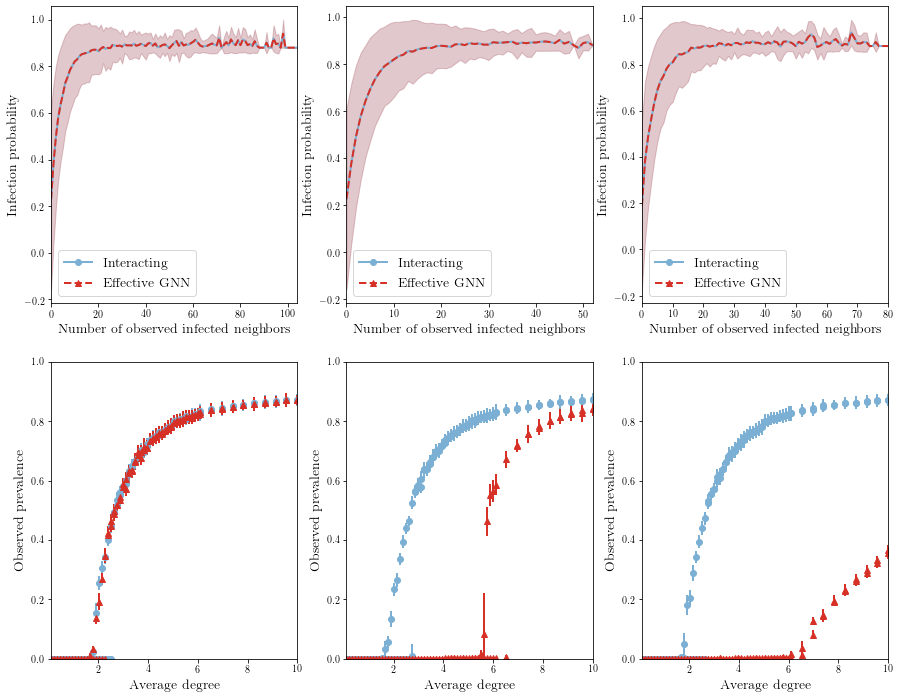

In [12]:
hp_array = [0., 0.25, 0.5]
dynamics = "partiallyhiddensissis"


true_colors = [dynalearn.utilities.color_pale["blue"], dynalearn.utilities.color_pale["red"], 
               dynalearn.utilities.color_pale["grey"]]
gnn_colors = [dynalearn.utilities.color_dark["blue"], dynalearn.utilities.color_dark["red"], 
              dynalearn.utilities.color_dark["grey"]]

fig, axes = plt.subplots(2, int(len(hp_array)), figsize=(5 * len(hp_array), 12))

s_cond = [0, 2]
i_cond = [1, 3]

for i, hp in enumerate(hp_array):
    ax = axes[:, i]
    experiment = Experiment.unzip(f"../data/phase2-data/training/summary/{dynamics}-ba-ns5000-hp{hp}.zip")
    experiment.load_metrics()
    ltp = experiment.metrics["TrueLTPMetrics"].data["ltp"]
    s = experiment.metrics["TrueLTPMetrics"].data["summaries"]
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=[1, 3], axis=i_cond)
    ax[0].plot(x, y, color=true_colors[0], ls='-', lw=2)
    ax[0].fill_between(x, yl, yh, color=true_colors[0], alpha=0.2)
    xmin, xmax = np.min(x), np.max(x)

    ltp = experiment.metrics["GNNLTPMetrics"].data["ltp"]
    s = experiment.metrics["GNNLTPMetrics"].data["summaries"]
    if dynamics == "sissis":
        x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=[1, 3], axis=i_cond)
    elif dynamics == "hiddensissis":
        x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=1, axis=i_cond)
    ax[0].plot(x, y, color=gnn_colors[1], ls='--', lw=2)
    ax[0].fill_between(x, yl, yh, color=gnn_colors[1], alpha=0.2)
    xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
    ax[0].set_xlim([xmin, xmax])
    # ax[0].set_ylim([0, 1])
    ax[0].set_xlabel('Number of observed infected neighbors', fontsize=14)
    ax[0].set_ylabel('Infection probability', fontsize=14)

    x = experiment.metrics["TruePESSMetrics"].data["parameters"]
    data1 = experiment.metrics["TruePESSMetrics"].data["absorbing_stationary_state"]
    data2 = experiment.metrics["TruePESSMetrics"].data["epidemic_stationary_state"]
    y1 = data1[:, 0, (1, 3)].sum(-1)
    y2 = data2[:, 0, (1, 3)].sum(-1)
    err1 = data1[:, 1, (1, 3)].sum(-1)
    err2 = data2[:, 1, (1, 3)].sum(-1)

    ax[1].errorbar(x, y1, yerr=err1, color=true_colors[0], ls='None', lw=2, marker='o')
    ax[1].errorbar(x, y2, yerr=err2, color=true_colors[0], ls='None', lw=2, marker='o')
    xmin, xmax = np.min(x), np.max(x)

    x = experiment.metrics["GNNPESSMetrics"].data["parameters"]
    data1 = experiment.metrics["GNNPESSMetrics"].data["absorbing_stationary_state"]
    data2 = experiment.metrics["GNNPESSMetrics"].data["epidemic_stationary_state"]

    y1 = data1[:, 0, (1, 3)].sum(-1)
    y2 = data2[:, 0, (1, 3)].sum(-1)
    err1 = data1[:, 1, (1, 3)].sum(-1)
    err2 = data2[:, 1, (1, 3)].sum(-1)
    ax[1].errorbar(x, y1, yerr=err1, color=gnn_colors[1], ls='None', lw=2, marker='^')
    ax[1].errorbar(x, y2, yerr=err2, color=gnn_colors[1], ls='None', lw=2, marker='^')
    xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
    ax[1].set_xlim([xmin, xmax])
    ax[1].set_ylim([0, 1])
    ax[1].set_xlabel('Average degree', fontsize=14)
    ax[1].set_ylabel('Observed prevalence', fontsize=14)

    handles = []
    handles.append(Line2D([0], [0], marker="o", linestyle='-', color=true_colors[0], lw=2, 
                          label=r'Interacting'))
    handles.append(Line2D([0], [0], marker="^", linestyle='--', color=gnn_colors[1], lw=2, 
                          label=r'Effective GNN'))
    ax[0].legend(handles=handles, loc=0, fontsize=14)


fig.savefig(f"{dynamics}-hp{hp}.png")

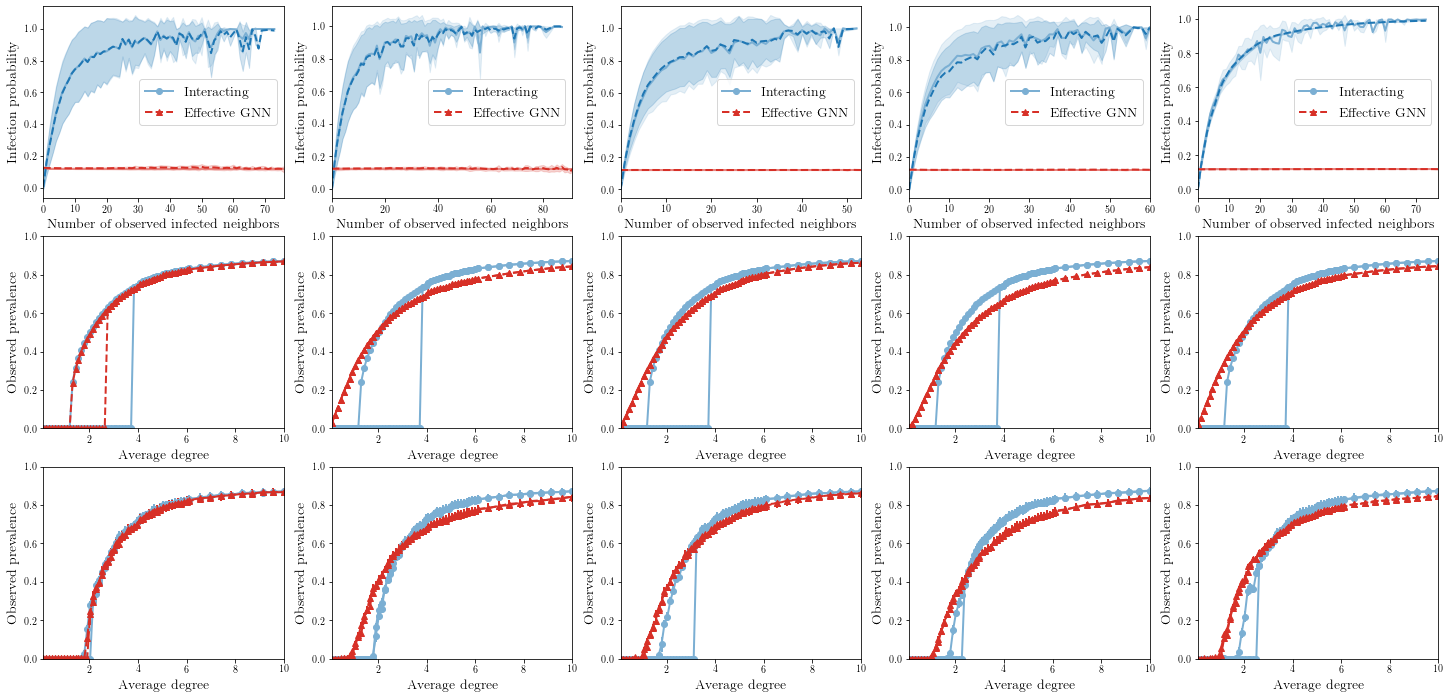

In [8]:
hp_array = [0., 0.25, 0.5, 0.75, 1.0]
dynamics = "partiallyhiddensissis"


true_colors = [dynalearn.utilities.color_pale["blue"], dynalearn.utilities.color_pale["red"], 
               dynalearn.utilities.color_pale["grey"]]
gnn_colors = [dynalearn.utilities.color_dark["blue"], dynalearn.utilities.color_dark["red"], 
              dynalearn.utilities.color_dark["grey"]]

fig, axes = plt.subplots(3, int(len(hp_array)), figsize=(5 * len(hp_array), 12))

s_cond = [0, 2]
i_cond = [1, 3]

for i, hp in enumerate(hp_array):
    if axes.ndim == 2:
        ax = axes[:, i]
    else:
        ax = axes
    experiment = Experiment.unzip(f"../data/phase2-data/training/summary/{dynamics}-ba-ns10000-hp{hp}.zip")
    experiment.load_metrics()
    ltp = experiment.metrics["TrueLTPMetrics"].data["ltp"]
    s = experiment.metrics["TrueLTPMetrics"].data["summaries"]
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=i_cond, axis=i_cond)
    ax[0].plot(x, y, color=true_colors[0], ls='-', lw=2)
    ax[0].fill_between(x, yl, yh, color=true_colors[0], alpha=0.2)
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=i_cond, out_state=s_cond, axis=i_cond)
    ax[0].plot(x, y, color=true_colors[1], ls='-', lw=2)
    ax[0].fill_between(x, yl, yh, color=true_colors[1], alpha=0.2)
    xmin, xmax = np.min(x), np.max(x)

    ltp = experiment.metrics["GNNLTPMetrics"].data["ltp"]
    s = experiment.metrics["GNNLTPMetrics"].data["summaries"]
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=s_cond, out_state=i_cond, axis=i_cond)
    ax[0].plot(x, y, color=gnn_colors[0], ls='--', lw=2)
    ax[0].fill_between(x, yl, yh, color=gnn_colors[0], alpha=0.2)
    
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=i_cond, out_state=s_cond, axis=i_cond)
    ax[0].plot(x, y, color=gnn_colors[1], ls='--', lw=2)
    ax[0].fill_between(x, yl, yh, color=gnn_colors[1], alpha=0.2)
    xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
    ax[0].set_xlim([xmin, xmax])
    # ax[0].set_ylim([0, 1])
    ax[0].set_xlabel('Number of observed infected neighbors', fontsize=14)
    ax[0].set_ylabel('Infection probability', fontsize=14)

    x = experiment.metrics["TruePEMFMetrics"].data["parameters"]
    data1 = experiment.metrics["TruePEMFMetrics"].data["absorbing_fixed_point"]
    data2 = experiment.metrics["TruePEMFMetrics"].data["epidemic_fixed_point"]
    y1 = data1[:, (1, 3)].sum(-1)
    y2 = data2[:, (1, 3)].sum(-1)

    ax[1].plot(x, y1, color=true_colors[0], ls='-', lw=2, marker='o')
    ax[1].plot(x, y2, color=true_colors[0], ls='-', lw=2, marker='o')
    xmin, xmax = np.min(x), np.max(x)

    x = experiment.metrics["GNNPEMFMetrics"].data["parameters"]
    data1 = experiment.metrics["GNNPEMFMetrics"].data["absorbing_fixed_point"]
    data2 = experiment.metrics["GNNPEMFMetrics"].data["epidemic_fixed_point"]

    y1 = data1[:, (1, 3)].sum(-1)
    y2 = data2[:, (1, 3)].sum(-1)
    ax[1].plot(x, y1, color=gnn_colors[1], ls='--', lw=2, marker='^')
    ax[1].plot(x, y2, color=gnn_colors[1], ls='--', lw=2, marker='^')
    xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
    ax[1].set_xlim([xmin, xmax])
    ax[1].set_ylim([0, 1])
    ax[1].set_xlabel('Average degree', fontsize=14)
    ax[1].set_ylabel('Observed prevalence', fontsize=14)
    
    x = experiment.metrics["TruePESSMetrics"].data["parameters"]
    data1 = experiment.metrics["TruePESSMetrics"].data["absorbing_stationary_state"]
    data2 = experiment.metrics["TruePESSMetrics"].data["epidemic_stationary_state"]
    y1 = data1[:, 0, (1, 3)].sum(-1)
    y2 = data2[:, 0, (1, 3)].sum(-1)
    err1 = data1[:, 1, (1, 3)].sum(-1)
    err2 = data2[:, 1, (1, 3)].sum(-1)

    ax[2].errorbar(x, y1, yerr=err1, color=true_colors[0], ls='-', lw=2, marker='o')
    ax[2].errorbar(x, y2, yerr=err2, color=true_colors[0], ls='-', lw=2, marker='o')
    xmin, xmax = np.min(x), np.max(x)

    x = experiment.metrics["GNNPESSMetrics"].data["parameters"]
    data1 = experiment.metrics["GNNPESSMetrics"].data["absorbing_stationary_state"]
    data2 = experiment.metrics["GNNPESSMetrics"].data["epidemic_stationary_state"]

    y1 = data1[:, 0, (1, 3)].sum(-1)
    y2 = data2[:, 0, (1, 3)].sum(-1)
    err1 = data1[:, 1, (1, 3)].sum(-1)
    err2 = data2[:, 1, (1, 3)].sum(-1)
    ax[2].errorbar(x, y1, yerr=err1, color=gnn_colors[1], ls='--', lw=2, marker='^')
    ax[2].errorbar(x, y2, yerr=err2, color=gnn_colors[1], ls='--', lw=2, marker='^')
    xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
    ax[2].set_xlim([xmin, xmax])
    ax[2].set_ylim([0, 1])
    ax[2].set_xlabel('Average degree', fontsize=14)
    ax[2].set_ylabel('Observed prevalence', fontsize=14)

    handles = []
    handles.append(Line2D([0], [0], marker="o", linestyle='-', color=true_colors[0], lw=2, 
                          label=r'Interacting'))
    handles.append(Line2D([0], [0], marker="^", linestyle='--', color=gnn_colors[1], lw=2, 
                          label=r'Effective GNN'))
    ax[0].legend(handles=handles, loc=0, fontsize=14)


fig.savefig(f"{dynamics}-hp_all.png")

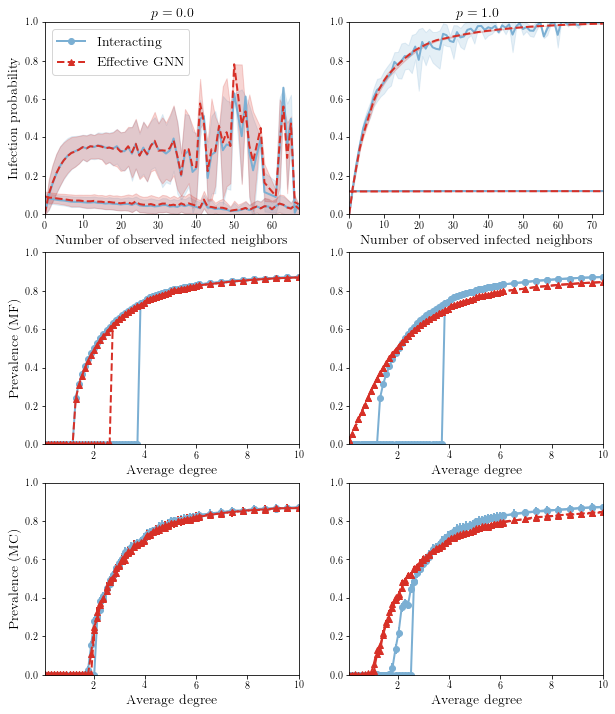

In [4]:
hp_array = [0., 1.]
network = "ba"
dynamics = "partiallyhiddensissis"


true_colors = [dynalearn.utilities.color_pale["blue"], dynalearn.utilities.color_pale["red"], 
               dynalearn.utilities.color_pale["grey"]]
gnn_colors = [dynalearn.utilities.color_dark["blue"], dynalearn.utilities.color_dark["red"], 
              dynalearn.utilities.color_dark["grey"]]

fig, axes = plt.subplots(3, int(len(hp_array)), figsize=(5 * len(hp_array), 12))

s_cond = [0, 2]
i_cond = [1, 3]

for i, hp in enumerate(hp_array):
    if axes.ndim == 2:
        ax = axes[:, i]
    else:
        ax = axes
    experiment = Experiment.unzip(f"../data/phase2-data/training/summary/{dynamics}-{network}-ns10000-hp{hp}.zip")
    experiment.load_metrics()
    ltp = experiment.metrics["TrueLTPMetrics"].data["ltp"]
    s = experiment.metrics["TrueLTPMetrics"].data["summaries"]
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=1, out_state=0, axis=i_cond)
    ax[0].plot(x, y, color=true_colors[0], ls='-', lw=2)
    ax[0].fill_between(x, yl, yh, color=true_colors[0], alpha=0.2)
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=0, out_state=1, axis=i_cond)
    ax[0].plot(x, y, color=true_colors[0], ls='-', lw=2)
    ax[0].fill_between(x, yl, yh, color=true_colors[0], alpha=0.2)
    xmin, xmax = np.min(x), np.max(x)

    ltp = experiment.metrics["GNNLTPMetrics"].data["ltp"]
    s = experiment.metrics["GNNLTPMetrics"].data["summaries"]
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=1, out_state=0, axis=i_cond)
    ax[0].plot(x, y, color=gnn_colors[1], ls='--', lw=2)
    ax[0].fill_between(x, yl, yh, color=gnn_colors[1], alpha=0.2)
    x, y, yl, yh = LTPMetrics.aggregate(ltp, s, in_state=0, out_state=1, axis=i_cond)
    ax[0].plot(x, y, color=gnn_colors[1], ls='--', lw=2)
    ax[0].fill_between(x, yl, yh, color=gnn_colors[1], alpha=0.2)
    xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
    ax[0].set_xlim([xmin, xmax])
    ax[0].set_ylim([0, 1])
    ax[0].set_xlabel('Number of observed infected neighbors', fontsize=14)
    if i == 0:
        ax[0].set_ylabel('Infection probability', fontsize=14)
    ax[0].set_title(f'$p = {hp}$', fontsize=14)
#     ax[0].plot(x, 1 - (1 - 0.15)**x, lw=2, ls="-.", color=dynalearn.utilities.color_dark["orange"])

    x = experiment.metrics["TruePEMFMetrics"].data["parameters"]
    data1 = experiment.metrics["TruePEMFMetrics"].data["absorbing_fixed_point"]
    data2 = experiment.metrics["TruePEMFMetrics"].data["epidemic_fixed_point"]
    y1 = data1[:, (1, 3)].sum(-1)
    y2 = data2[:, (1, 3)].sum(-1)

    ax[1].plot(x, y1, color=true_colors[0], ls='-', lw=2, marker='o')
    ax[1].plot(x, y2, color=true_colors[0], ls='-', lw=2, marker='o')
    xmin, xmax = np.min(x), np.max(x)

    x = experiment.metrics["GNNPEMFMetrics"].data["parameters"]
    data1 = experiment.metrics["GNNPEMFMetrics"].data["absorbing_fixed_point"]
    data2 = experiment.metrics["GNNPEMFMetrics"].data["epidemic_fixed_point"]

    y1 = data1[:, (1, 3)].sum(-1)
    y2 = data2[:, (1, 3)].sum(-1)
    ax[1].plot(x, y1, color=gnn_colors[1], ls='--', lw=2, marker='^')
    ax[1].plot(x, y2, color=gnn_colors[1], ls='--', lw=2, marker='^')
    xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
    ax[1].set_xlim([xmin, xmax])
    ax[1].set_ylim([0, 1])
    ax[1].set_xlabel('Average degree', fontsize=14)
    if i == 0:
        ax[1].set_ylabel('Prevalence (MF)', fontsize=14)
    
    x = experiment.metrics["TruePESSMetrics"].data["parameters"]
    data1 = experiment.metrics["TruePESSMetrics"].data["absorbing_stationary_state"]
    data2 = experiment.metrics["TruePESSMetrics"].data["epidemic_stationary_state"]
    y1 = data1[:, 0, (1, 3)].sum(-1)
    y2 = data2[:, 0, (1, 3)].sum(-1)
    err1 = data1[:, 1, (1, 3)].sum(-1)
    err2 = data2[:, 1, (1, 3)].sum(-1)

    ax[2].errorbar(x, y1, yerr=err1, color=true_colors[0], ls='-', lw=2, marker='o')
    ax[2].errorbar(x, y2, yerr=err2, color=true_colors[0], ls='-', lw=2, marker='o')
    xmin, xmax = np.min(x), np.max(x)

    x = experiment.metrics["GNNPESSMetrics"].data["parameters"]
    data1 = experiment.metrics["GNNPESSMetrics"].data["absorbing_stationary_state"]
    data2 = experiment.metrics["GNNPESSMetrics"].data["epidemic_stationary_state"]

    y1 = data1[:, 0, (1, 3)].sum(-1)
    y2 = data2[:, 0, (1, 3)].sum(-1)
    err1 = data1[:, 1, (1, 3)].sum(-1)
    err2 = data2[:, 1, (1, 3)].sum(-1)
    ax[2].errorbar(x, y1, yerr=err1, color=gnn_colors[1], ls='--', lw=2, marker='^')
    ax[2].errorbar(x, y2, yerr=err2, color=gnn_colors[1], ls='--', lw=2, marker='^')
    xmin, xmax = np.max([xmin, np.min(x)]), np.min([xmax,np.max(x)])
    ax[2].set_xlim([xmin, xmax])
    ax[2].set_ylim([0, 1])
    ax[2].set_xlabel('Average degree', fontsize=14)
    if i == 0:
        ax[2].set_ylabel('Prevalence (MC)', fontsize=14)
    
    if i==0:
        handles = []
        handles.append(Line2D([0], [0], marker="o", linestyle='-', color=true_colors[0], lw=2, 
                              label=r'Interacting'))
        handles.append(Line2D([0], [0], marker="^", linestyle='--', color=gnn_colors[1], lw=2, 
                              label=r'Effective GNN'))
        ax[0].legend(handles=handles, loc=0, fontsize=14)


# fig.savefig(f"{dynamics}-{network}.png")

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import dynalearn
from scipy.optimize import minimize, fsolve, minimize_scalar
import tqdm


In [2]:
def get_edge_index(G):
    return dynalearn.utilities.to_edge_index(G).numpy()
    
def generate_data(G, num_samples, dynamics):
    dynamics.network = G
    transform = dynalearn.datasets.transforms.PartiallyRemapStateTransform()
    transform.state_map = dynamics.state_map
    transform.hide_prob = dynamics.hide_prob
    X = np.zeros((num_samples, G.number_of_nodes()))
    x = dynamics.initial_state(0.5)
    for i in range(num_samples):
        X[i] = dynamics.sample(x)
        x = X[i] * 1

    Y = transform(X)
    return X, Y, dynamics.loglikelihood(Y, X)

def mle_infection_prob(data):
    X, G = data
    N = G.number_of_nodes()
    a = np.zeros(N)
    n = np.zeros(N)
    adj = nx.to_numpy_array(G)
    X_t = X[:-1]
    X_tp1 = X[1:]
    s_nodes_t = np.logical_or(X_t == 0, X_t == 2)
    i_neigh_t = (1 - s_nodes_t) @ adj
    i_nodes_tp1 = np.logical_or(X_tp1 == 1, X_tp1 == 3)
    for l in range(G.number_of_nodes()):
        index = np.where(i_neigh_t == l)
        if len(index) == 0:
            continue
        else:
            a[l] = np.logical_and(s_nodes_t[index], i_nodes_tp1[index]).sum()
            n[l] = s_nodes_t[index].sum()
    l = np.where(n > 0)[0]
    y = a[l] / n[l]
    f = lambda p, x: 1 - (1 - p)**x
    mse = lambda p: np.sum((y - f(p, l))**2)**0.5
    p_mle = minimize(mse, 0.5)
    return p_mle.x[0]

def mle_recovery_prob(data):
    (X, G) = data
    num_recovery_events = 0
    num_events = 0
    X_t = X[:-1]
    X_tp1 = X[1:]
    i_nodes_t = np.logical_or(X_t == 1, X_t == 3)
    s_nodes_tp1 = np.logical_or(X_tp1 == 0, X_tp1 == 2)
    
    p_mle = np.logical_and(i_nodes_t, s_nodes_tp1).sum() / i_nodes_t.sum()
    return p_mle

def mle_noise(data):
    (X, G) = data
    
    return (np.sum(X == 2) + np.sum(X == 3)) / np.prod(X.shape) + 1e-15

In [21]:
def sis_loglikelihood(data, a, b, c):
    X, G = data
    eff_dynamics = dynalearn.dynamics.SISnoise(infection1=a, recovery=b, noise=c)
    eff_dynamics.network = G
    return eff_dynamics.loglikelihood(X)
            
    
def likelihood_ratio(G, num_samples, dynamics):
    X, Y, l1 = generate_data(G, num_samples, dynamics)
    
    a = mle_infection_prob((Y, G))
    b = mle_recovery_prob((Y, G))
    c = mle_noise((Y, G))
    
    l2 = sis_loglikelihood((Y, G), a, b, c)
    return (l1 - l2) / np.prod(X.shape)
    
    


In [38]:
G = nx.barabasi_albert_graph(100, 2)
c = [1. ,2.,5., 10.]
config = dynalearn.config.DynamicsConfig.partially_hidden_sissis_default()
for j, cc in enumerate(c):
    config.coupling = [2.]
    dynamics = dynalearn.dynamics.PartiallyHiddenSISSIS(config)
    num_samples = 100
    p = np.linspace(0, 1, 100)
    lr = np.zeros(p.shape[0])
    pb = tqdm.tqdm_notebook(range(p.shape[0]))
    for i, pp in enumerate(p):
        pb.update()
        dynamics.hide_prob = pp
        lr[i] = likelihood_ratio(G, num_samples, dynamics)

In [39]:
lr3 = lr.copy()

0.030303030303030276


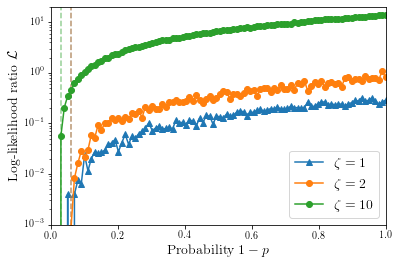

In [40]:
p1 = plt.plot(1 - p, lr2, marker='^', ls='-', label=r"$\zeta = 1$")
x0 = 1 - p[np.argmin(np.abs(lr2))]
plt.axvline(x0, ls='--', color=p1[0].get_color(), alpha=0.5)

p2 = plt.plot(1 - p, lr3, marker='o', ls='-', label=r"$\zeta = 2$")
x0 = 1 - p[np.argmin(np.abs(lr3))]
plt.axvline(x0, ls='--', color=p2[0].get_color(), alpha=0.5)

p3 = plt.plot(1 - p, lr1, marker='o', ls='-', label=r"$\zeta = 10$")
x0 = 1 - p[np.argmin(np.abs(lr1))]
plt.axvline(x0, ls='--', color=p3[0].get_color(), alpha=0.5)

plt.xlabel(r'Probability $1 - p$', fontsize=14)
plt.ylabel(r'Log-likelihood ratio $\mathcal{L}$', fontsize=14)
plt.xlim([0, 1])
plt.ylim([1e-3, 20])
plt.yscale('log')
plt.legend(fontsize=14)

# plt.savefig('likelihood-ratio.png')

In [25]:
G = nx.barabasi_albert_graph(10, 2)
num_samples = 1000
config = dynalearn.config.DynamicsConfig.partially_hidden_sissis_default()
config.coupling = 10.
config.hide_prob = 1.
dynamics = dynalearn.dynamics.PartiallyHiddenSISSIS(config)

X, Y, l1 = generate_data(G, num_samples, dynamics)

In [26]:
dynamics.loglikelihood(Y,X)

-171.60716376804658

In [27]:
dynamics.loglikelihood(X, X)

-777.6724639854846